## Compare our atmospheric HNL prediction to current limits

Using the notebook from https://github.com/mhostert/Heavy-Neutrino-Limits/blob/main/0_limits_mixing.ipynb

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from HNLimits import plot_tools
from  HNLimits import hnl_tools

import numpy as np
from numpy import ma

import matplotlib.pyplot as plt
from matplotlib import cm, ticker, colors
import matplotlib.cm as cm

import pandas as pd


In [3]:
case_tau = hnl_tools.Limits(flavor='tau', invisible=False, nature='majorana')

In [4]:
kwargs = {
    'xrange': (1e-3,1e3),
    'yrange': (1e-10,4e-1),
    #
    'skip_ids': [],
    #
    'new_color': {
        'borexino_plestid': '#BAABDA', #7149C6
        'charm': '#ECA0B6', #6886C5  FA697C FF9668
        'charm_2021': '#43919B', 
        'bebc_barouki': '#8F4068',
        'delphi_long': '#98DED9', #B9FFF8 4CD3C2
        'delphi_short': '#93329E',  
        #'delphi_short': '#A799B7', 
        #'delphi_long': '#98DED9',
        'pmns_unitarity': '#52057B',  #FFD581
        'cosmo': 'gray',
        'babar_2022': '#423F3E', #423F3E 
        'belle_2024': 'grey', #423F3E 
        'argoneut': '#F6F6D9', #BFB051 FDCB9E
        'atmospheric': '#7149C6' #FB2576
    },       
    #
    'new_dash': {
        'cosmo': (1,(4,2))
    },
    #
    'new_labelpos': {
        'borexino_plestid': (5e-3, 14e-3),
        'charm': (40e-3, 2.6e-4),
        'charm_2021': (3e-1,8e-7),
        'delphi_long': (2,6e-6),
        'delphi_short': (10,5.6e-6),
        'pmns_unitarity': (1e2,5e-4),
        'cosmo': (1.4e-3,2e-10),
        'argoneut': (3.2e-1,6e-4),
        'babar_2022': (1.34,5e-6),
        'atmospheric': (1.4e-3,5e-2),
        'bebc_barouki': (1,6e-7),
        'belle_2024': (1.15,4e-2)
    },
    #
    "new_rotation": {
        'charm': -32,
        'charm_2021': -32,
        'argoneut': -48,
        'babar_2022': 90,
        'belle_2024': -60
    },
    #
    # 'force_label_color': 'black',
}

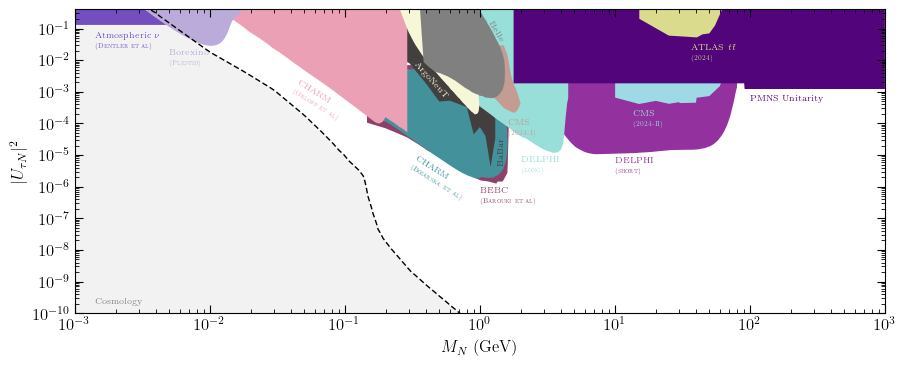

In [5]:
fig, ax = plot_tools.std_plot_limits(case_tau, color_fill=True, **kwargs)

In [6]:
integration_results = pd.read_csv("results_with_branching.csv") #pd.read_csv("predicted_events4.csv")
nicks_results = pd.read_csv('/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/nkamp/IceCube/PromptHNL/ForJulia.txt', delimiter=' ')
nicks_results.columns=['m','U', 'num_1year']
new_results = pd.read_csv("predicted_events_with_branching_1_2_25.csv")

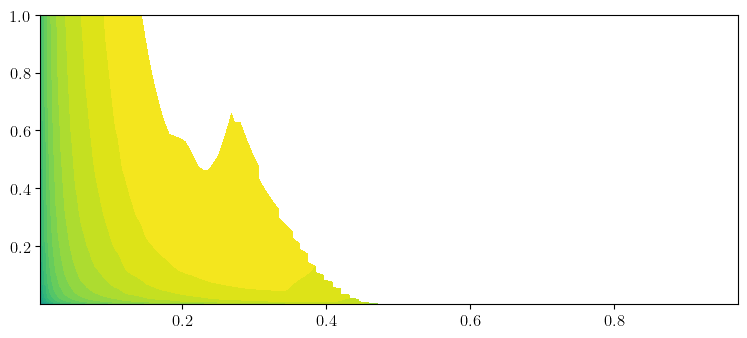

In [7]:
# Load Nick's estimate
m_nick= nicks_results['m']
u_nick = nicks_results['U']

nicks_masses = sorted(set(m_nick))
nicks_masses.pop() # Removing the mass with only 99 values do it's all square - they're all Nan anyway

m_nick = np.asarray(nicks_masses)
u_nick = np.asarray(sorted(set(u_nick)))

Xn, Yn, = np.meshgrid(m_nick, u_nick, indexing='ij')

zn = np.asarray(nicks_results['num_1year']*10)
zn = zn[-19900:] #Remove z values associated with removed mass
zn = zn.reshape(199, -1)

fig1, ax1 = plt.subplots()

lev_exp = np.arange(-20., 9)
levs = np.power(10, lev_exp)
nicks = ax1.contourf(Xn, Yn, zn, levs, norm=colors.LogNorm())


In [16]:
# Load my estimates:
m_range = np.logspace(-3, 0, 100)
U_range = np.logspace(-4, -1, 100)

X, Y = np.meshgrid(m_range, U_range, indexing='ij')

z = np.asarray(integration_results["visible_nevents"])
z = z.reshape((100, -1))

nick_compare = np.asarray(integration_results['e+e- events'])
nick_compare = nick_compare.reshape((100, -1))

visible_events = np.asarray(integration_results['visible_nevents'])
visible_events = visible_events.reshape((100, -1))

In [17]:
# Load new estimates with updated lifetime:
n_points=100
m_range = np.logspace(-2, 0.3, n_points)
U_range = np.logspace(-6.5, 0, n_points)

X, Y = np.meshgrid(m_range, U_range, indexing='ij')

# z = np.asarray(new_results["num_detected"])
# z = z.reshape((100, -1))

visible_events1 = np.asarray(new_results['num_visible'])
visible_events1 = visible_events1.reshape((100, -1))

/tmp/ipykernel_3997723/1752267302.py:6: UserWarning: Log scale: values of z <= 0 have been masked
  old_contour = ax1.contourf(X, Y, visible_events, levs, norm=colors.LogNorm()) #plot this elsewhere
/tmp/ipykernel_3997723/1752267302.py:8: UserWarning: Log scale: values of z <= 0 have been masked
  nick_compare_cont = ax1.contourf(X, Y, nick_compare, levs, norm=colors.LogNorm())
/tmp/ipykernel_3997723/1752267302.py:10: UserWarning: Log scale: values of z <= 0 have been masked
  new_contour = ax.contourf(X, Y, visible_events1, levs, norm=colors.LogNorm())


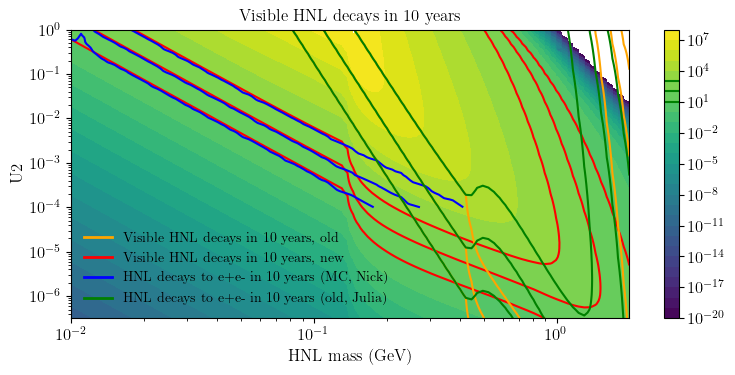

In [22]:
fig, ax = plt.subplots()

lev_exp = np.arange(-20., 9)
levs = np.power(10, lev_exp)

old_contour = ax1.contourf(X, Y, visible_events, levs, norm=colors.LogNorm()) #plot this elsewhere
# cbar = fig.colorbar(cs)
nick_compare_cont = ax1.contourf(X, Y, nick_compare, levs, norm=colors.LogNorm())

new_contour = ax.contourf(X, Y, visible_events1, levs, norm=colors.LogNorm())
cbar = fig.colorbar(new_contour)

CS2 = ax.contour(new_contour, levels=[10, 100, 1000], colors='r')
cbar.add_lines(CS2)

CS_old = ax.contour(old_contour, levels=[10, 100, 1000], colors='orange')
cbar.add_lines(CS_old)

CS_Nick = ax.contour(nicks, levels=[10, 100, 1000], colors='b')
cbar.add_lines(CS_Nick)

CS_nick_compare = ax.contour(nick_compare_cont, levels=[10, 100, 1000], colors='g')
cbar.add_lines(CS_nick_compare)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('HNL mass (GeV)')
ax.set_ylabel("U2")
ax.set_xlim(min(m_range), max(m_range))
ax.set_ylim(min(U_range), max(U_range))

plt.title("Visible HNL decays in 10 years")
# Create proxy artists for legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color='orange', lw=2, label='Visible HNL decays in 10 years, old'),
    Line2D([0], [0], color='r', lw=2, label='Visible HNL decays in 10 years, new'),
    Line2D([0], [0], color='b', lw=2, label='HNL decays to e+e- in 10 years (MC, Nick)'),
    Line2D([0], [0], color='g', lw=2, label='HNL decays to e+e- in 10 years (old, Julia)')
]

# Add legend
ax.legend(handles=legend_elements, loc='lower left')

plt.show()

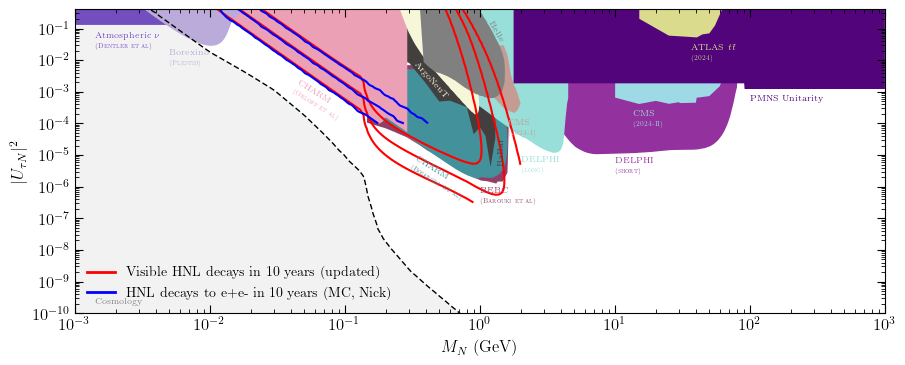

In [23]:
combined_fig, combined_ax = plot_tools.std_plot_limits(case_tau, color_fill=True, **kwargs)

# CS2 = combined_ax.contour(old_contour, levels=[10, 100, 1000], colors='orange')

CS_ee = combined_ax.contour(new_contour, levels=[10, 100, 1000], colors='r')

CS_Nick = combined_ax.contour(nicks, levels=[10, 100, 1000], colors='b')

legend_elements = [
    # Line2D([0], [0], color='orange', lw=2, label='Visible HNL decays in 10 years'),
    Line2D([0], [0], color='r', lw=2, label='Visible HNL decays in 10 years (updated)'),
    Line2D([0], [0], color='b', lw=2, label='HNL decays to e+e- in 10 years (MC, Nick)')
]

# Add legend
combined_ax.legend(handles=legend_elements, loc='lower left')
plt.show()
